In [1]:
from matplotlib import pyplot as plt
import numpy as np
from wannierberri.system.system_R import System_R
from wannierberri.grid import Path
from wannierberri.evaluate_k import evaluate_k_path
from wannierberri.w90files.soc import SOC
from wannierberri.system.system_soc import SystemSOC
from wannierberri.w90files.chk import CheckPoint as CHK
from wannierberri.parallel import Parallel, Serial

system_dw = System_R().load_npz("system_dw")
system_up = System_R().load_npz("system_up")

parallel = Parallel(num_cpus=16)
# _interlaced()


phi_deg = 90
theta_deg = 90

theta_rad = theta_deg / 180 * np.pi
phi_rad = phi_deg / 180 * np.pi

soc = SOC.from_gpaw("mnte-nscf.gpw")
chk_up = CHK.from_npz("system_up.chk.npz")
chk_dw = CHK.from_npz("system_dw.chk.npz")
system_soc = SystemSOC(system_up=system_up, system_down=system_dw,)
system_soc.set_soc_R(soc, chk_up=chk_up, chk_down=chk_dw,
                     theta=theta_rad, phi=phi_rad,)




2025-09-30 16:16:30,058	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


loading real_lattice - Ok!
loading wannier_centers_cart - Ok!
loading pointgroup - Ok!
loading iRvec - Ok!
loading periodic - Ok!
loading is_phonon - Ok!
loading num_wann - Ok!
loading R_matrix Ham - Ok!
loading real_lattice - Ok!
loading wannier_centers_cart - Ok!
loading pointgroup - Ok!
loading iRvec - Ok!
loading periodic - Ok!
loading is_phonon - Ok!
loading num_wann - Ok!
loading R_matrix Ham - Ok!
initializing ray with  {'num_cpus': 16}


2025-09-30 16:16:32,018	INFO worker.py:1918 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


number of bands = 60
h_soc.shape=(144, 2, 2, 2, 2, 60, 60)
nspin in SOC: 2
setting Rvec


array([[[ 0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j],
        [ 0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
         -0.00000000e+00+0.00000000e+00j, ...,
         -0.00000000e+00+0.00000000e+00j,
         -0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j],
        [-0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
         -0.00000000e+00+0.00000000e+00j, ...,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j],
        ...,
        [-0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -0.00000000e+00+0.00000000e+00j,
         -0.00000000e+00+0.00000000e+00j

In [2]:

kz = 0.35 / system_dw.recip_lattice[2, 2]
path = Path(system_dw,
            nodes=[
                [2 / 3, -1 / 3, 0],
                [0, 0, 0],
                [-2 / 3, 1 / 3, 0],
                None,
                [-0.5, 0, kz],
                [0, 0, kz],
                [0.5, 0, kz],
            ],
            labels=[r"${\rm K}\leftarrow$",
                    r"$\Gamma$",
                    r"$\rightarrow{\rm K}$",
                    r"$\overline{\rm M}\leftarrow$",
                    r"$\overline{\Gamma}$",
                    r"$\rightarrow\overline{\rm M}$"],
            length=200)   # length [ Ang] ~= 2*pi/dk

bands_up = evaluate_k_path(system_up, path=path,)
bands_dw = evaluate_k_path(system_dw, path=path,)


print(system_dw.recip_lattice)
print(np.dot(path.K_list, system_dw.recip_lattice))

bands_soc = evaluate_k_path(system_soc, path=path, quantities=["spin"])


Starting run()
Using the follwing calculators : 
############################################################

 'tabulate'  :  <wannierberri.calculators.tabulate.TabulatorAll object at 0x7eeae816c8f0>  : 
    TabulatorAll - a pack of all k-resolved calculators (Tabulators)
    
 Includes the following tabulators : 
--------------------------------------------------
 "Energy" : <wannierberri.calculators.tabulate.Energy object at 0x7eeae820ce30> : calculator not described

--------------------------------------------------

############################################################
Calculation along a path - checking calculators for compatibility
tabulate <wannierberri.calculators.tabulate.TabulatorAll object at 0x7eeae816c8f0>
All calculators are compatible
Symmetrization switched off for Path
Grid is regular
The set of k points is a Path() with 121 points and labels {0: '${\\rm K}\\leftarrow$', 32: '$\\Gamma$', 64: '$\\overline{\\rm M}\\leftarrow$', 92: '$\\overline{\\Gamma}$', 120: 

/home/stepan/github/wannier-berri-work/wannier-berri-soc-nscf/wannierberri/grid/path.py:163: UserWarning: symmetry is not used for a tabulation along path
  warnings.warn("symmetry is not used for a tabulation along path")


time for processing    121 K-points in serial:     0.1543 ; per K-point          0.0013 ; proc-sec per K-point          0.0013
time1 =  0.0012674331665039062
Totally processed 121 K-points 
run() finished
[[1.51988034 0.87750332 0.        ]
 [0.         1.75500664 0.        ]
 [0.         0.         0.94455582]]
[[ 1.01325356e+00 -4.53328779e-18  0.00000000e+00]
 [ 9.81589383e-01 -2.12768167e-18  0.00000000e+00]
 [ 9.49925210e-01  1.38777878e-17  0.00000000e+00]
 [ 9.18261036e-01  1.62833939e-17  0.00000000e+00]
 [ 8.86596862e-01  1.86890000e-17  0.00000000e+00]
 [ 8.54932689e-01 -2.08166817e-17  0.00000000e+00]
 [ 8.23268515e-01 -1.84110756e-17  0.00000000e+00]
 [ 7.91604341e-01 -1.60054695e-17  0.00000000e+00]
 [ 7.59940168e-01  0.00000000e+00  0.00000000e+00]
 [ 7.28275994e-01  2.40560612e-18  0.00000000e+00]
 [ 6.96611820e-01  1.16111439e-17  0.00000000e+00]
 [ 6.64947647e-01  2.08166817e-17  0.00000000e+00]
 [ 6.33283473e-01  2.32222878e-17  0.00000000e+00]
 [ 6.01619299e-01 -2.30

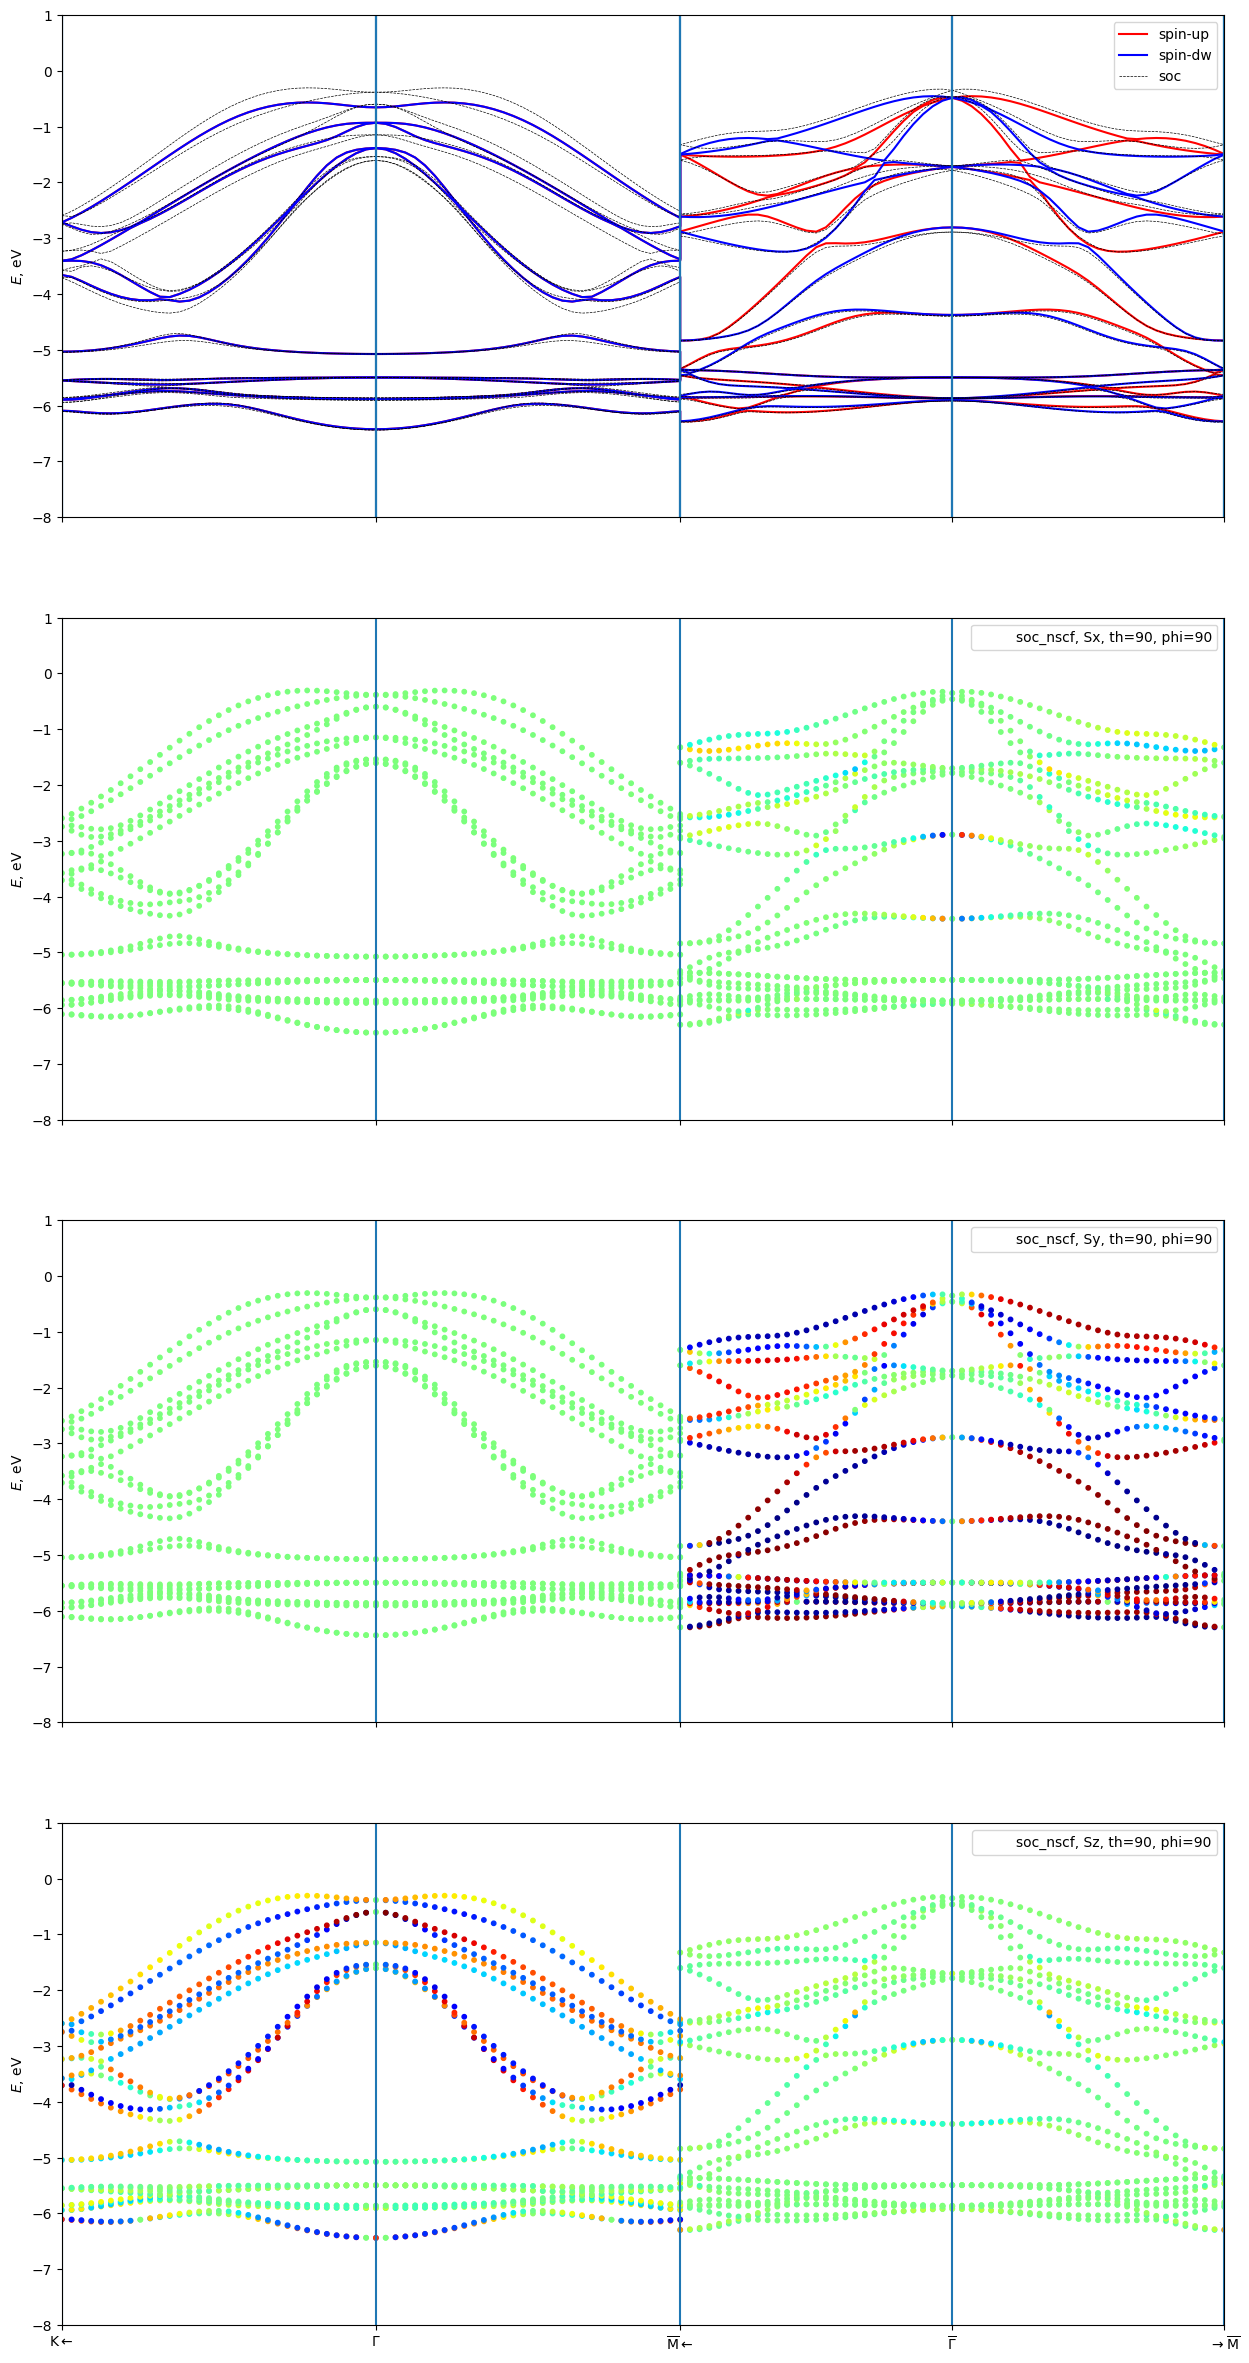

In [3]:

EF = 6.885145845031927

fig, axes = plt.subplots(4, 1, sharey=True, sharex=True, figsize=(15, 30))

for i in range(3):
    component = "xyz"[i]
    bands_soc.plot_path_fat(path=path,
                       Eshift=EF,
                       quantity="spin",
                       component=component,
                       mode="color",
                       label=f"soc_nscf, S{component}, th={theta_deg}, phi={phi_deg}",
                        axes=axes[1 + i],
                       fatmax=10,
                        linecolor="orange",
                        close_fig=False,
                        show_fig=False,
                        kwargs_line=dict(linestyle='-', lw=0.0),
    )



bands_up.plot_path_fat(path=path,
                       Eshift=EF,
                       axes=axes[0],
                       label="spin-up",
                       linecolor="red",
                       close_fig=False,
                       show_fig=False,
)

bands_dw.plot_path_fat(path=path,
                       label="spin-dw",
                       axes=axes[0],
                       Eshift=EF,
                       linecolor="blue",
                       close_fig=False,
                       show_fig=False,)




bands_soc.plot_path_fat(path=path,
                       label="soc",
                       Eshift=EF,
                       axes=axes[0],
                        linecolor="black",
                        kwargs_line=dict(linestyle='--', lw=0.5),
                        close_fig=False,
                        show_fig=False,)




# plt.ylim(0,7)
plt.ylim(-8, 1)
plt.savefig("bands-MnTe-wannier.png")


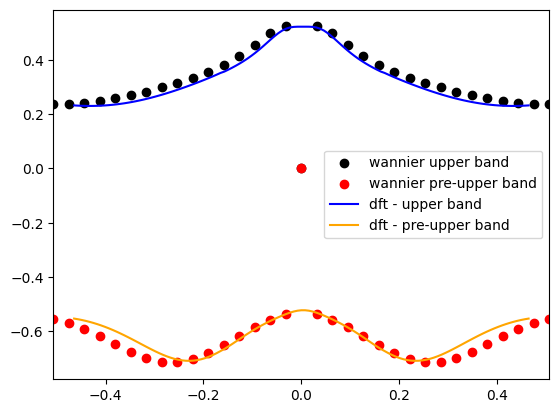

In [6]:


energies = bands_soc.get_data("Energy")
spin = bands_soc.get_data("spin", component="z")
kline = path.getKline()
kpoints = path.K_list
ikG = np.where( (np.abs(kpoints) < 1e-8).all(axis=1))[0][0]
kG = kline[ikG]

plt.scatter(kline-kG, spin[:,-1], color="black", label="wannier upper band")
plt.scatter(kline-kG, spin[:,-2], color="red", label="wannier pre-upper band")

data = np.loadtxt("../MnTe-Iaro/bands_spin_soc-weak.dat")
data[:,0] -= data[-1,0]/2
data[:,0]*= 0.529

plt.plot(data[:,0], data[:,4], color="blue", label="dft - upper band")
plt.plot(data[:,0], data[:,2], color="orange", label="dft - pre-upper band")

plt.xlim(-kG/2, kG/2)
plt.legend()


# print(spin_soc.shape)


In [16]:
path.K_list @ system_dw.recip_lattice

array([[ 1.01325356e+00, -4.53328779e-18,  0.00000000e+00],
       [ 9.81589383e-01, -2.12768167e-18,  0.00000000e+00],
       [ 9.49925210e-01,  1.38777878e-17,  0.00000000e+00],
       [ 9.18261036e-01,  1.62833939e-17,  0.00000000e+00],
       [ 8.86596862e-01,  1.86890000e-17,  0.00000000e+00],
       [ 8.54932689e-01, -2.08166817e-17,  0.00000000e+00],
       [ 8.23268515e-01, -1.84110756e-17,  0.00000000e+00],
       [ 7.91604341e-01, -1.60054695e-17,  0.00000000e+00],
       [ 7.59940168e-01,  0.00000000e+00,  0.00000000e+00],
       [ 7.28275994e-01,  2.40560612e-18,  0.00000000e+00],
       [ 6.96611820e-01,  1.16111439e-17,  0.00000000e+00],
       [ 6.64947647e-01,  2.08166817e-17,  0.00000000e+00],
       [ 6.33283473e-01,  2.32222878e-17,  0.00000000e+00],
       [ 6.01619299e-01, -2.30833256e-17,  0.00000000e+00],
       [ 5.69955126e-01, -1.38777878e-17,  0.00000000e+00],
       [ 5.38290952e-01, -1.14721817e-17,  0.00000000e+00],
       [ 5.06626779e-01, -2.26664389e-18